In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# charger le fichier csv :
fichier_csv = r"/content/REGLEMENTS_CARTES_PREPAYEES_FAST_FOOD-_2_.csv"
df = pd.read_csv(fichier_csv)
df.head()

,ID_Règlement,ID_Operation,Date_Règlement,Heure_Règlement,Paiement,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,ID_Client,...,Bénéficiaire_CPP,Solde_CPP,ID_Restaurant,Restaurant,ID_User,Prenom User,Role,Statut,Pointage,Date_Sys
0,287967,700877295,2024-02-29,08:07:37,Carte prépayée,NaN,13.5,13.5,0.0,CLT10001,...,MOUMOUN,952.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
1,287983,700877305,2024-02-29,08:17:54,Carte prépayée,NaN,8.0,8.0,0.0,CLT10001,...,FARAIDI,921.51,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
2,287994,700877312,2024-02-29,08:23:33,Carte prépayée,NaN,20.0,20.0,0.0,CLT10001,...,RACHIDI Salah,790.00,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-29
3,282957,700874995,2024-02-22,11:19:17,Carte prépayée,NaN,87.0,87.0,0.0,CLT10001,...,EL AZRAK,346.23,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-22
4,282972,700874999,2024-02-22,11:31:14,Carte prépayée,NaN,5.0,5.0,0.0,CLT10001,...,ZERIOUEL,875.50,RST10005,Café - Boulangerie - Pâtisserie - Rabat,USR10004,Hamza,Caissier,Validé,NaN,2024-02-22


In [8]:
"""La méthode df.info() de pandas est utilisée pour obtenir un résumé concis de la structure du DataFrame, y compris
des informations sur les types de données, le nombre d'entrées, et la quantité de valeurs manquantes."""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Règlement      15222 non-null  int64  
 1   ID_Operation      15222 non-null  int64  
 2   Date_Règlement    15222 non-null  object 
 3   Heure_Règlement   15222 non-null  object 
 4   Paiement          15222 non-null  object 
 5   Référence         99 non-null     float64
 6   Montant_Rgl       15222 non-null  float64
 7   Montant_Versé     15222 non-null  float64
 8   Montant_Rst       15222 non-null  float64
 9   ID_Client         10690 non-null  object 
 10  Client            10690 non-null  object 
 11  ID_CartePP        15222 non-null  object 
 12  Bénéficiaire_CPP  14668 non-null  object 
 13  Solde_CPP         15222 non-null  float64
 14  ID_Restaurant     15222 non-null  object 
 15  Restaurant        15222 non-null  object 
 16  ID_User           15221 non-null  object

In [9]:
"""La méthode df.describe() dans pandas fournit des statistiques descriptives pour les colonnes numériques d'un DataFrame.
Cela inclut des informations comme la moyenne, l'écart-type, les valeurs minimales, maximales, et les percentiles pour
chaque colonne numérique."""
df.describe()

,ID_Règlement,ID_Operation,Référence,Montant_Rgl,Montant_Versé,Montant_Rst,Solde_CPP,Pointage
count,15222.000000,1.522200e+04,9.900000e+01,15222.000000,15222.000000,1.522200e+04,15222.000000,0.0
mean,304552.634673,6.415931e+08,5.541115e+15,33.954553,33.954553,-1.406516e-08,631.318233,NaN
std,38098.097638,1.482726e+08,3.240446e+15,59.042239,59.042240,1.320466e-06,671.655797,NaN
min,250355.000000,2.019016e+08,5.850000e+02,1.500000,1.500000,-9.918212e-05,1.500000,NaN
25%,271202.750000,5.005158e+08,2.759346e+15,10.000000,10.000000,0.000000e+00,100.000000,NaN
50%,299481.500000,7.008713e+08,4.293358e+15,24.000000,24.000000,0.000000e+00,330.000000,NaN
75%,334226.750000,7.008972e+08,9.432400e+15,45.000000,45.000000,0.000000e+00,960.875000,NaN
max,388034.000000,9.061058e+08,9.942445e+15,2799.527996,2799.528076,5.340576e-05,6000.000000,NaN


In [10]:
"""convertir la colonne 'Date_Règlement' en type de données datetime dans votre DataFrame df. L'option errors='coerce' force les valeurs
 qui ne peuvent pas être converties en dates à devenir NaT (Not a Time), ce qui est utile pour traiter des dates incorrectes ou mal formatées."""

df['Date_Règlement'] = pd.to_datetime(df['Date_Règlement'], errors='coerce')
df['Date_Règlement']

,Date_Règlement
0,2024-02-29
1,2024-02-29
2,2024-02-29
3,2024-02-22
4,2024-02-22
...,...
15217,2024-09-04
15218,2024-09-04
15219,2024-09-04
15220,2024-09-04


In [11]:
invalid_dates = df[df['Date_Règlement'].isna()]
print(invalid_dates)

Empty DataFrame
Columns: [ID_Règlement, ID_Operation, Date_Règlement, Heure_Règlement, Paiement, Référence, Montant_Rgl, Montant_Versé, Montant_Rst, ID_Client, Client, ID_CartePP, Bénéficiaire_CPP, Solde_CPP, ID_Restaurant, Restaurant, ID_User, Prenom User, Role, Statut, Pointage, Date_Sys]
Index: []

[0 rows x 22 columns]


In [12]:
"""Si une valeur ne correspond pas à ce format, elle est transformée en NaT grâce à l'option errors='coerce'.
.dt.time : Extrait uniquement la composante heure (sans la date)."""

df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S', errors='coerce').dt.time
df[['Date_Règlement', 'Heure_Règlement']].dtypes

,0
Date_Règlement,datetime64[ns]
Heure_Règlement,object


In [13]:
# Convertir les colonnes en float puis arrondir à 2 chiffres après la virgule

df['Montant_Rgl'] = df['Montant_Rgl'].astype(float).round(2)
df['Montant_Rgl']

,Montant_Rgl
0,13.5
1,8.0
2,20.0
3,87.0
4,5.0
...,...
15217,7.0
15218,35.0
15219,54.0
15220,5.0


In [14]:
""" grouped_daily: Regroupe les montants par jour ('D') et fait la somme des montants pour chaque jour.
resample('D'), resample('W'), et resample('M') regroupe les données par jour, semaine et mois respectivement.
reset_index() remet les données dans un format de DataFrame classique. """

grouped_daily = df.set_index('Date_Règlement').resample('D')['Montant_Rgl'].sum().reset_index()
grouped_weekly = df.set_index('Date_Règlement').resample('W')['Montant_Rgl'].sum().reset_index()
grouped_monthly = df.set_index('Date_Règlement').resample('M')['Montant_Rgl'].sum().reset_index()
print(grouped_daily)
print(grouped_weekly)
print(grouped_monthly)

    Date_Règlement  Montant_Rgl
0       2024-01-01      2185.50
1       2024-01-02      3928.50
2       2024-01-03      3614.50
3       2024-01-04      3856.00
4       2024-01-05      3912.50
..             ...          ...
243     2024-08-31      1402.55
244     2024-09-01      2100.40
245     2024-09-02      2816.70
246     2024-09-03      2135.89
247     2024-09-04       211.00

[248 rows x 2 columns]
   Date_Règlement  Montant_Rgl
0      2024-01-07     22882.50
1      2024-01-14     23154.00
2      2024-01-21     23715.07
3      2024-01-28     10680.94
4      2024-02-04     21554.38
5      2024-02-11     22371.50
6      2024-02-18     21011.28
7      2024-02-25     20132.67
8      2024-03-03     18709.12
9      2024-03-10     25836.64
10     2024-03-17     11496.49
11     2024-03-24     10574.00
12     2024-03-31     12445.70
13     2024-04-07      8745.91
14     2024-04-14      5748.00
15     2024-04-21     13479.28
16     2024-04-28     20529.39
17     2024-05-05     13094.00
18 

<ipython-input-14-b361b98dff0d>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_monthly = df.set_index('Date_Règlement').resample('M')['Montant_Rgl'].sum().reset_index()


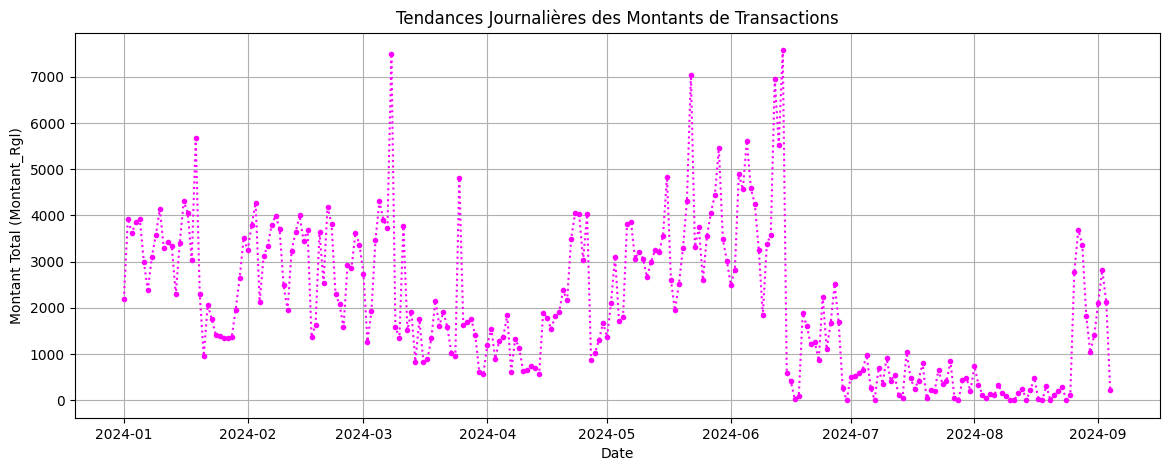

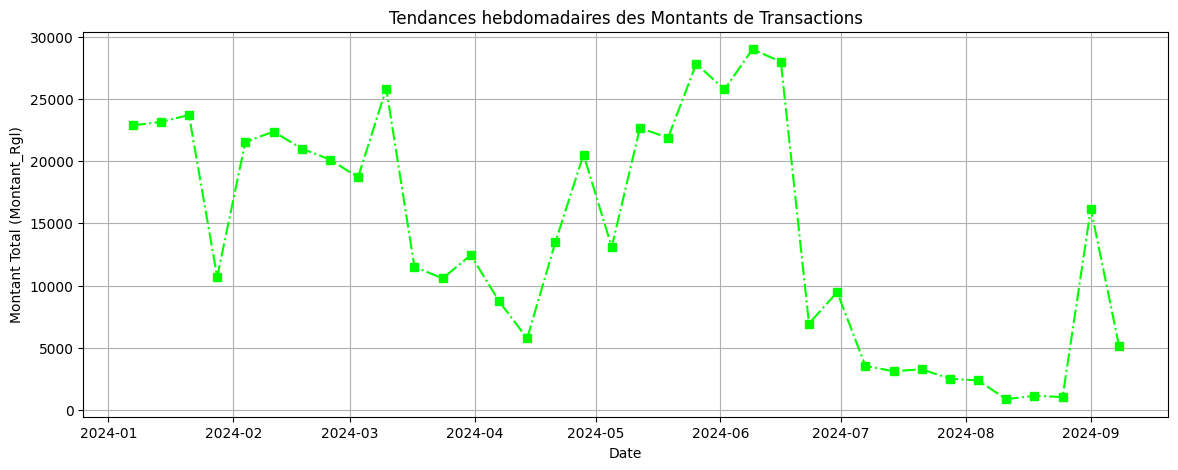

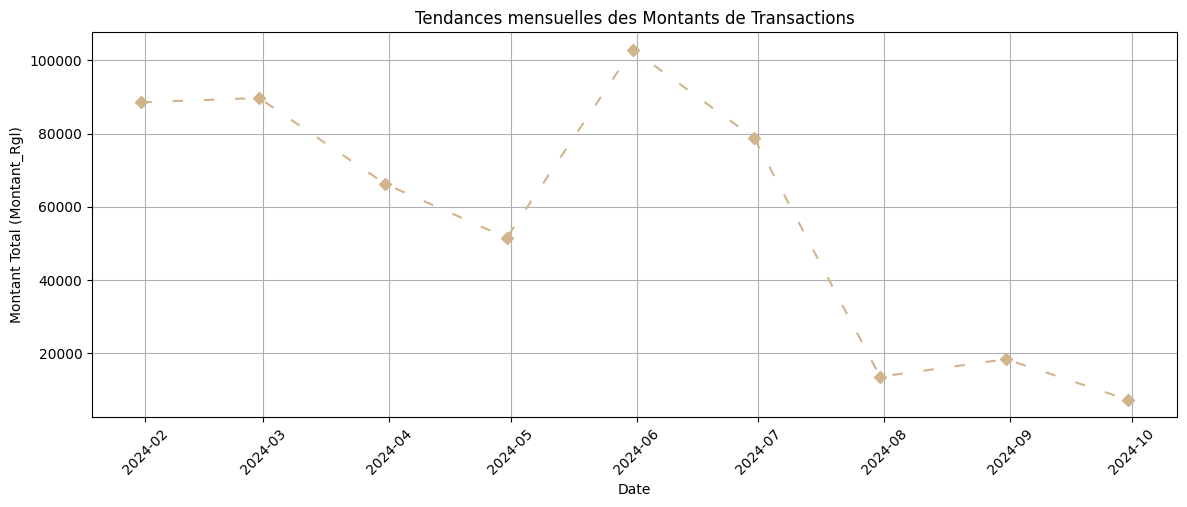

In [15]:
# Générer le graphique linéaire pour les tendances journalières
plt.figure(figsize=(14, 5)) #Crée une figure de taille 14x5 (largeur x hauteur).
plt.plot(grouped_daily['Date_Règlement'],grouped_daily['Montant_Rgl'], marker='.', linestyle=':', color='Fuchsia')
plt.title('Tendances Journalières des Montants de Transactions')
plt.xlabel('Date')
plt.ylabel('Montant Total (Montant_Rgl)')
plt.grid(True)
plt.show()

# Générer le graphique linéaire pour les tendances hebdomadaires
plt.figure(figsize=(14, 5))
plt.plot(grouped_weekly['Date_Règlement'],grouped_weekly['Montant_Rgl'], marker='s', linestyle='-.', color='Lime')
plt.title('Tendances hebdomadaires des Montants de Transactions')
plt.xlabel('Date')
plt.ylabel('Montant Total (Montant_Rgl)')
plt.grid(True)
plt.show()

# Générer le graphique linéaire pour les tendances mensuelles
plt.figure(figsize=(14, 5))
plt.plot(grouped_monthly['Date_Règlement'] ,grouped_monthly['Montant_Rgl'], marker='D', linestyle=(0, (5, 10)), color='Tan')
plt.title('Tendances mensuelles des Montants de Transactions')
plt.xlabel('Date')
plt.ylabel('Montant Total (Montant_Rgl)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
Average_Daily_Balance = df.groupby(df['Date_Règlement'].dt.date)['Solde_CPP'].mean().reset_index(name='Solde_Moyen')
Average_Daily_Balance

,Date_Règlement,Solde_Moyen
0,2024-01-01,467.240260
1,2024-01-02,484.587836
2,2024-01-03,576.126336
3,2024-01-04,421.185064
4,2024-01-05,495.011348
...,...,...
238,2024-08-31,1593.842667
239,2024-09-01,1413.277317
240,2024-09-02,1178.408626
241,2024-09-03,1057.243431


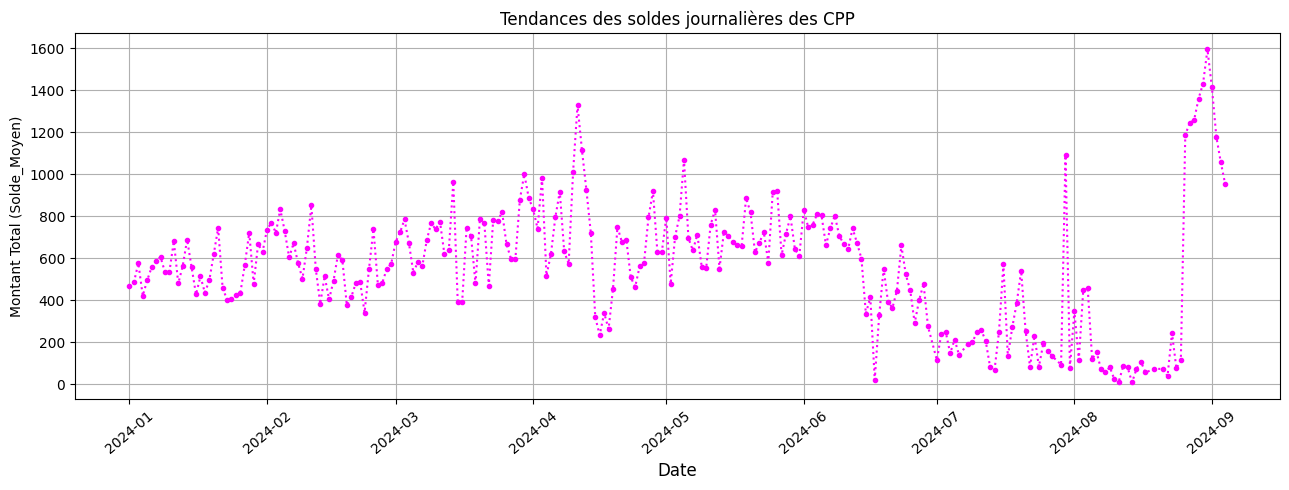

In [17]:
# Créer le graphique linéaire pour les tendances des soldes journalières des CPP
plt.figure(figsize=(13, 5))
plt.plot(Average_Daily_Balance['Date_Règlement'],Average_Daily_Balance['Solde_Moyen'], marker='.', linestyle=':', color='Fuchsia')
plt.title('Tendances des soldes journalières des CPP')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Montant Total (Solde_Moyen)')
plt.xticks(rotation=40)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
#1. Identifier les plus gros dépensiers en groupant les transactions par client

# calculer la somme dépensée et le nombre de transaction pour chaque client en ordre décroissant
# Grouper par client et calculer le montant total dépensé
client_spending = df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index()

# Trier par montant total dépensé en ordre décroissant
top_spenders = client_spending.sort_values(by='Montant_Rgl', ascending=False)

# Afficher les 10 clients les plus dépensiers
top_10_spenders = top_spenders.head(10)
print(top_10_spenders)


    Bénéficiaire_CPP  Montant_Rgl
735            RIFAI     17737.56
230            CHAGH     12992.54
764          SELMANI     12726.85
192      BOUICHENADE     11338.00
728         REGRAGUI     10653.67
277          DOUDOUH     10428.10
374      EL YAAGOUBI     10137.21
631         MINTOAMA      9119.00
366     EL MOUNTADAR      8889.07
805          ZAABOUL      8840.30


In [19]:
 # 2. Calculer la dépense moyenne par transaction pour chaque client.
# Grouper par client et calculer le nombre de transactions et le montant total
client_groupé = df.groupby('Bénéficiaire_CPP').agg(
    somme_dépensée=('Montant_Rgl', 'sum'),
    nombre_transaction=('Montant_Rgl', 'count')
).reset_index()

# Calculer la dépense moyenne par transaction
client_groupé['depense_moyenne'] = client_groupé['somme_dépensée'] / client_groupé['nombre_transaction']

# Trier par dépense moyenne et récupérer les 10 premiers
top_10_average_spent = client_groupé.sort_values(by='depense_moyenne', ascending=False).head(10)
print(top_10_average_spent)


    Bénéficiaire_CPP  somme_dépensée  nombre_transaction  depense_moyenne
735            RIFAI        17737.56                  51       347.795294
497           HOUSNI         2985.06                  10       298.506000
72            AROUKI          270.00                   1       270.000000
26        ADOU MARIE          565.00                   3       188.333333
726           RAZOUK          528.00                   3       176.000000
365     EL MOUKTARID          647.00                   5       129.400000
103    BARAKA KAMAVU          610.00                   5       122.000000
606            MAHIR          235.00                   2       117.500000
652            MPOLO          220.00                   2       110.000000
762          SEKKATE          110.00                   1       110.000000


In [20]:
# Analyser les tendances du solde des cartes prépayées pour les clients les plus dépensiers.
# Calculer le solde moyen des cartes prépayées pour chaque client
client_balance = df.groupby('Bénéficiaire_CPP')['Solde_CPP'].mean().reset_index()
print(client_balance)
# Trier par solde moyen et récupérer les 10 clients avec le solde moyen le plus élevé
top_10_balance = client_balance.sort_values(by='Solde_CPP', ascending=False).head(10)
print(top_10_balance)


        Bénéficiaire_CPP    Solde_CPP
0                  AABID    72.900000
1                  AABIL  1295.144000
2                  AARAB   924.408095
3              AARIBECHE    14.500000
4                  AAYLA   114.261250
..                   ...          ...
850            meryem el    92.375000
851               nassri    61.253333
852  nouhaila alaoui ait    39.750000
853               rhazal   147.510000
854                sylla    55.666667

[855 rows x 2 columns]
        Bénéficiaire_CPP    Solde_CPP
42             AIT HAJJI  6000.000000
517                JAIED  4956.833333
562               KRAIMI  2695.700000
753      SAMRANI Mohamed  1959.500000
198             BOULAICH  1959.000000
486              HASSOUN  1952.703333
345         EL KHAMLICHI  1949.066667
80            AWI Detine  1934.624000
215  BOUTGAYOUT Mohammed  1934.555000
208             BOUSMARA  1912.790000


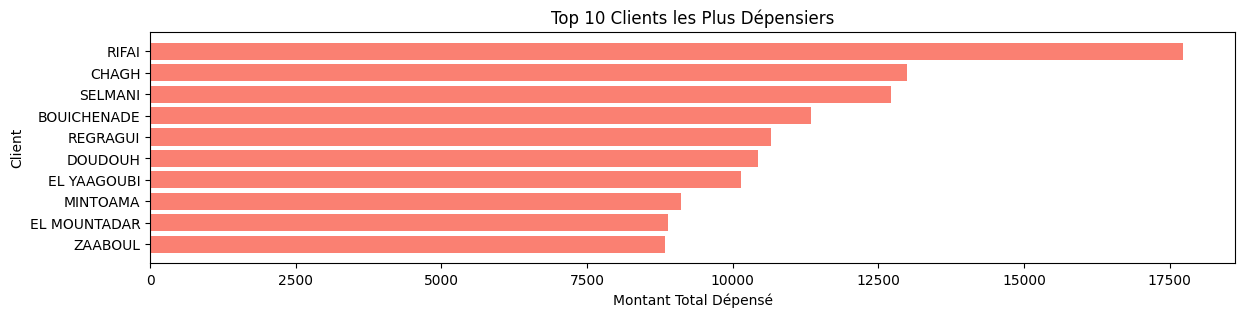

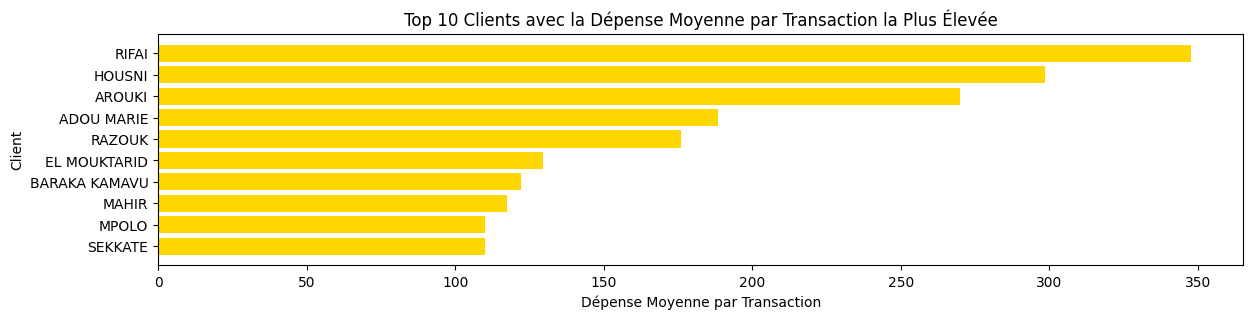

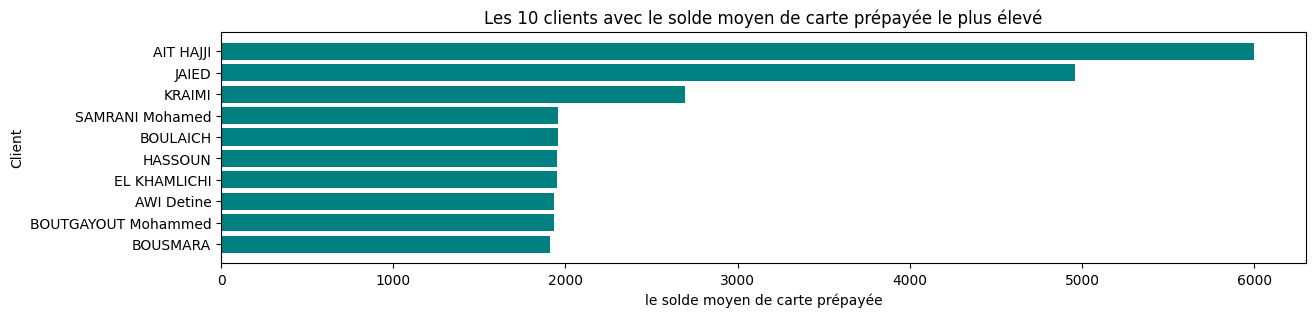

In [21]:
# Créer des graphiques en barres pour visualiser
# Les 10 clients les plus dépensiers par montant total dépensé.
plt.figure(figsize=(14, 3))
plt.barh(top_10_spenders['Bénéficiaire_CPP'], top_10_spenders['Montant_Rgl'], color='Salmon')
plt.title('Top 10 Clients les Plus Dépensiers')
plt.xlabel('Montant Total Dépensé')
plt.ylabel('Client')
plt.gca().invert_yaxis()  # Inverser l'ordre des clients pour que le plus gros soit en haut
plt.show()

# Les 10 clients avec la dépense moyenne par transaction la plus élevée.
plt.figure(figsize=(14, 3))
plt.barh(top_10_average_spent['Bénéficiaire_CPP'], top_10_average_spent['depense_moyenne'], color='Gold')
plt.title('Top 10 Clients avec la Dépense Moyenne par Transaction la Plus Élevée')
plt.xlabel('Dépense Moyenne par Transaction')
plt.ylabel('Client')
plt.gca().invert_yaxis()  # Inverser l'ordre des clients pour que le plus gros soit en haut
plt.show()

# Les 10 clients avec le solde moyen de carte prépayée le plus élevé.
plt.figure(figsize=(14, 3))
plt.barh(top_10_balance['Bénéficiaire_CPP'], top_10_balance['Solde_CPP'], color='Teal')
plt.title('Les 10 clients avec le solde moyen de carte prépayée le plus élevé')
plt.xlabel('le solde moyen de carte prépayée')
plt.ylabel('Client')
plt.gca().invert_yaxis()  # Inverser l'ordre des clients pour que le plus gros soit en haut
plt.show()

Ces graphiques permettront de visualiser rapidement les clients les plus importants en termes de dépenses et de comportement lié aux cartes prépayées.

In [22]:
# Filtrer les transactions avec montants restants impayés
unpaid_transactions = df[df['Montant_Rst'] > 0]

# Grouper par client et calculer le montant total impayé
client_unpaid = unpaid_transactions.groupby('Bénéficiaire_CPP')['Montant_Rst'].sum().reset_index()

# Trier les clients par montant total impayé en ordre décroissant
top_unpaid_clients = client_unpaid.sort_values(by='Montant_Rst', ascending=False)

# Afficher les 10 clients avec les montants restants impayés les plus élevés
top_10_unpaid_clients = top_unpaid_clients.head(10)
print(top_10_unpaid_clients)

   Bénéficiaire_CPP   Montant_Rst
24            RIFAI  7.629394e-05
27          SELMANI  4.482269e-05
23         REGRAGUI  2.288818e-05
16           HOUSNI  2.145767e-06
26     SEGBEDJI Yao  1.907349e-06
13      EL YAAGOUBI  1.907349e-06
5             CHAGH  1.907349e-06
8           DOUDOUH  1.907349e-06
18     KADIRI Lalla  9.536743e-07
1          AMEZIANE  9.536743e-07


In [23]:
# Filtrer les transactions avec des soldes de carte prépayée égaux à zéro (Solde_CPP == 0) et analyser ces clients.

# Filtrer les transactions avec un solde de carte prépayée égal à zéro
zero_balance_transactions = df[df['Solde_CPP'] == 0]

Si la valeur Solde_CPP == 0 n'existe pas dans notre base de données, le reste du code ne générera pas d'erreur mais ne produira aucun résultat utile. Voici ce qui se passera dans ce cas :

Filtre des transactions avec Solde_CPP == 0 : Si aucune transaction n'a un solde égal à zéro, le DataFrame zero_balance_transactions sera vide.
Groupement par client : Comme il n'y a pas de transactions à solde zéro, le DataFrame client_zero_balance sera également vide.
Trier et afficher : Le code continuera de fonctionner, mais les DataFrames top_zero_balance_clients et top_10_zero_balance_clients seront vides, donc aucun résultat ne sera affiché.

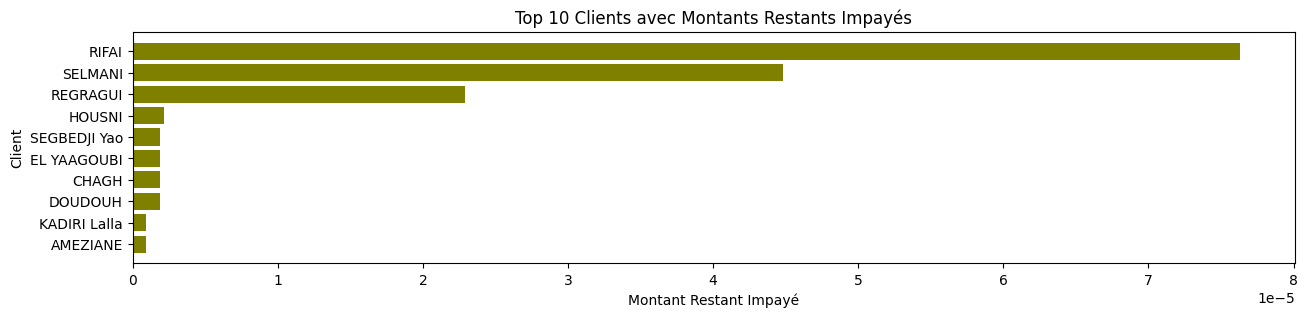

In [24]:
# 3 Créer des graphiques en barres pour visualiser les clients avec les montants restants impayés les plus élevés.

plt.figure(figsize=(15, 3))
plt.barh(top_10_unpaid_clients['Bénéficiaire_CPP'], top_10_unpaid_clients['Montant_Rst'], color='Olive')
plt.title('Top 10 Clients avec Montants Restants Impayés')
plt.xlabel('Montant Restant Impayé')
plt.ylabel('Client')
plt.gca().invert_yaxis()  # Inverser l'ordre des clients pour que celui avec le plus grand montant soit en haut
plt.show()

In [25]:
#Analyse des heures de pointe et des lieux les plus performants :

# Grouper les transactions par (Restaurant) et calculer les revenus totaux (Montant_Rgl):
Restaurants_performants = df.groupby('Restaurant')['Montant_Rgl'].sum().reset_index()

# Analyser les lieux les plus performants:
Restaurants_plus_performants = Restaurants_performants.sort_values(by='Montant_Rgl', ascending=False).head(7)
Restaurants_plus_performants

,Restaurant,Montant_Rgl
6,Snack Pizzeria - Rabat,207864.00
0,Café - Boulangerie - Pâtisserie - Rabat,183514.50
3,Lavomatic - Rabat,46274.14
4,Pharmacie & Parapharmacie - Rabat,33323.79
2,L'Casis Cafétéria HCZ,21571.50
5,Restaurant Gastronomique - Rabat,16405.00
1,Epicerie - Rabat,7903.25


In [26]:
# Identifier les heures de pointe en groupant les données par Heure_Règlement (heure).

# Convertir la colonne Heure_Règlement en datetime et extraire seulement l'heure
df['Heure'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S').dt.hour

# Grouper par heure et calculer le total des montants de transactions
revenus_par_heure = df.groupby('Heure')['Montant_Rgl'].sum().reset_index()
print(revenus_par_heure)

    Heure  Montant_Rgl
0       1        97.50
1       4       102.50
2       6       146.50
3       7      4456.50
4       8     10326.50
5       9     20665.06
6      10     33411.79
7      11     31374.29
8      12     73608.17
9      13     41926.62
10     14     32142.45
11     15     35243.34
12     16     38596.50
13     17     42160.73
14     18     29733.79
15     19     44813.10
16     20     27568.79
17     21     28129.95
18     22     21570.10
19     23       782.00


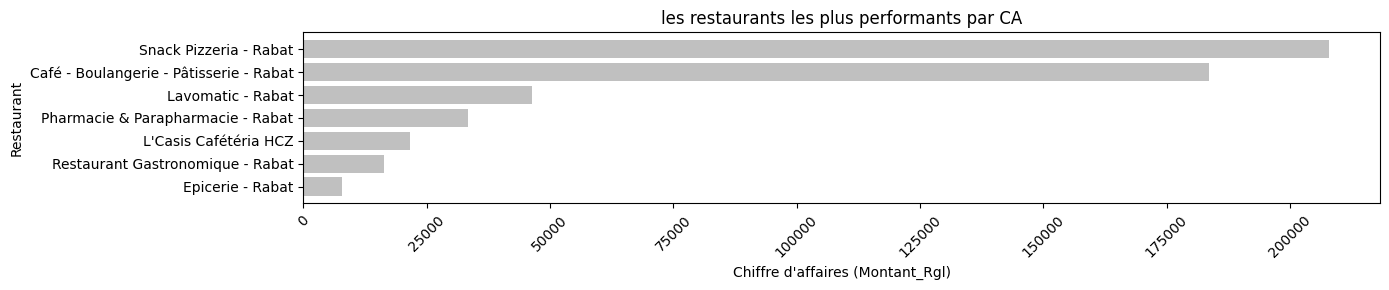

In [27]:
# Visualiser les 10 restaurants les plus performants
plt.figure(figsize=(14, 3))
plt.barh(Restaurants_plus_performants['Restaurant'], Restaurants_plus_performants['Montant_Rgl'], color='silver')
plt.title('les restaurants les plus performants par CA')
plt.xlabel("Chiffre d'affaires (Montant_Rgl)")
plt.ylabel('Restaurant')
plt.gca().invert_yaxis()  # Inverser l'ordre des clients pour que celui avec le plus grand montant soit en haut
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

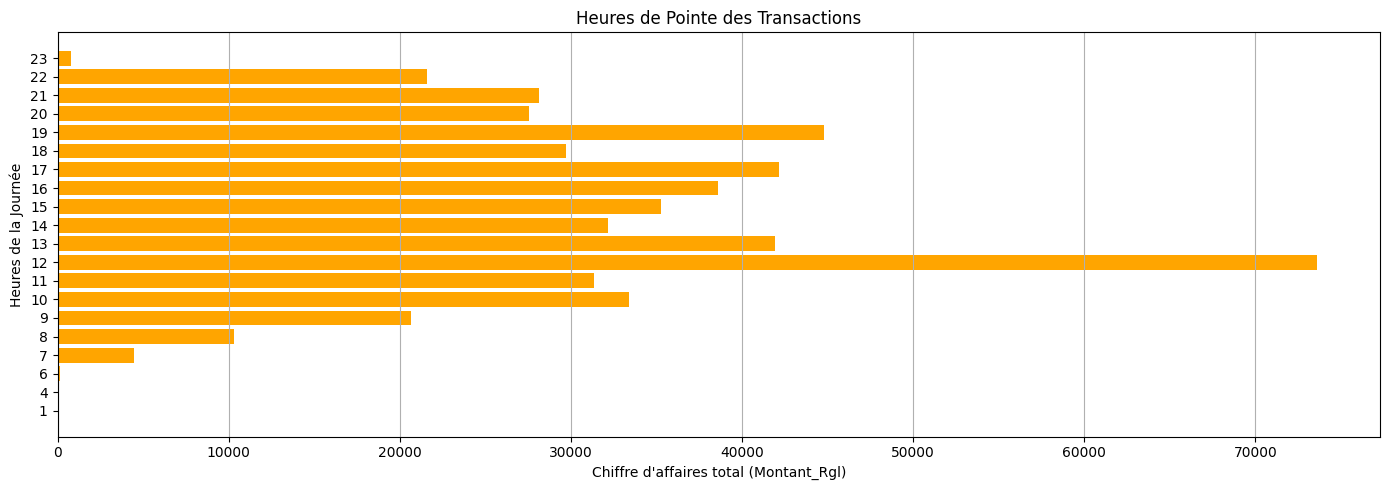

In [28]:
# Visualiser les heures de pointe des transactions
plt.figure(figsize=(14, 5))
plt.barh(revenus_par_heure['Heure'].astype(str), revenus_par_heure['Montant_Rgl'], color='orange') # Convertir l'heure en chaîne pour l'affichage
plt.title("Heures de Pointe des Transactions")
plt.xlabel("Chiffre d'affaires total (Montant_Rgl)")
plt.ylabel("Heures de la Journée")
plt.grid(axis='x')  # Ajouter une grille sur l'axe des x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

In [29]:
# Étape 1 : Calculer les quartiles
Q1 = df['Montant_Rgl'].quantile(0.25)
Q3 = df['Montant_Rgl'].quantile(0.75)
IQR = Q3 - Q1

# Étape 2 : Définir les limites pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Étape 3 : Identifier ou filtrer les anomalies détectées
anomalies = df[(df['Montant_Rgl'] < lower_bound) | (df['Montant_Rgl'] > upper_bound)]

# Grouper les anomalies par client, restaurant et heure
grouped_anomalies_c = anomalies.groupby(['Bénéficiaire_CPP']).size().reset_index(name='count')
grouped_anomalies_r = anomalies.groupby(['Restaurant']).size().reset_index(name='count')
grouped_anomalies_h = anomalies.groupby(['Heure']).size().reset_index(name='count')

# Trier les groupes par nombre d'anomalies décroissantes
GA_c = grouped_anomalies_c.sort_values(by='count', ascending=False).head(10)
GA_r = grouped_anomalies_r.sort_values(by='count', ascending=False)
GA_h = grouped_anomalies_h.sort_values(by='count', ascending=False)

# Afficher le résultat
print("Anomalies groupées par client, restaurant, et heure :")
print(GA_c,'\n', GA_r,'\n', GA_h )


Anomalies groupées par client, restaurant, et heure :
    Bénéficiaire_CPP  count
24       BOUICHENADE     37
27             CHAGH     35
114            RIFAI     32
113         REGRAGUI     23
53       EL YAAGOUBI     20
119          SELMANI     17
38           DOUDOUH     14
62           FARAIDI     13
131          ZAABOUL     13
81            MAARIF     11 
                                 Restaurant  count
3                        Lavomatic - Rabat    181
0  Café - Boulangerie - Pâtisserie - Rabat    142
6                   Snack Pizzeria - Rabat    119
4        Pharmacie & Parapharmacie - Rabat     56
5         Restaurant Gastronomique - Rabat     53
2                    L'Casis Cafétéria HCZ      9
1                         Epicerie - Rabat      4 
     Heure  count
5      13     74
4      12     71
8      16     61
7      15     56
3      11     54
9      17     44
6      14     42
2      10     41
10     18     36
13     21     25
11     19     23
12     20     17
14     22    

In [30]:
grouped_anomalies_h

,Heure,count
0,8,5
1,9,6
2,10,41
3,11,54
4,12,71
5,13,74
6,14,42
7,15,56
8,16,61
9,17,44


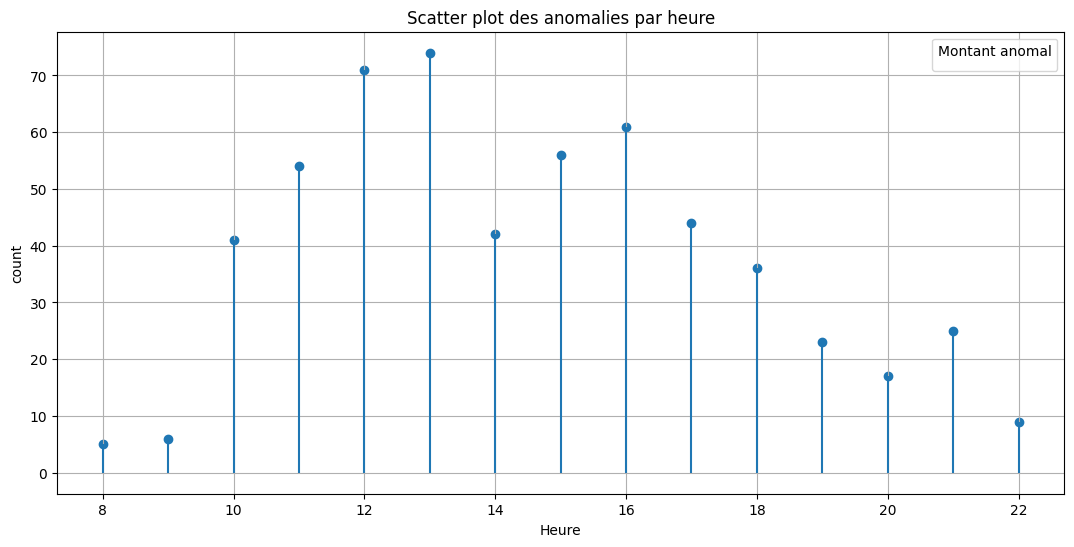

In [31]:
# Scatter plot pour montrer les anomalies par heure
plt.figure(figsize=(13, 6))
plt.scatter(grouped_anomalies_h['Heure'], grouped_anomalies_h['count'])
plt.title('Scatter plot des anomalies par heure')
plt.xlabel('Heure')
plt.ylabel('count')
plt.legend(title='Montant anomal')
plt.vlines(grouped_anomalies_h['Heure'], 0, grouped_anomalies_h['count'])
plt.grid()
plt.show()

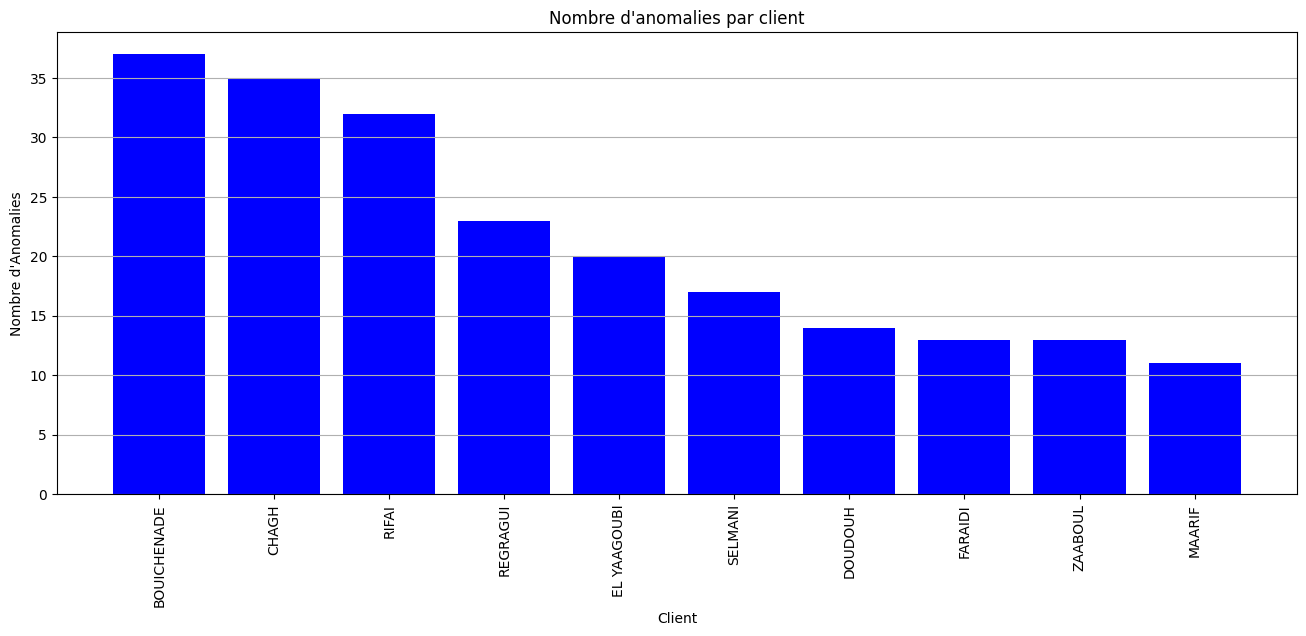

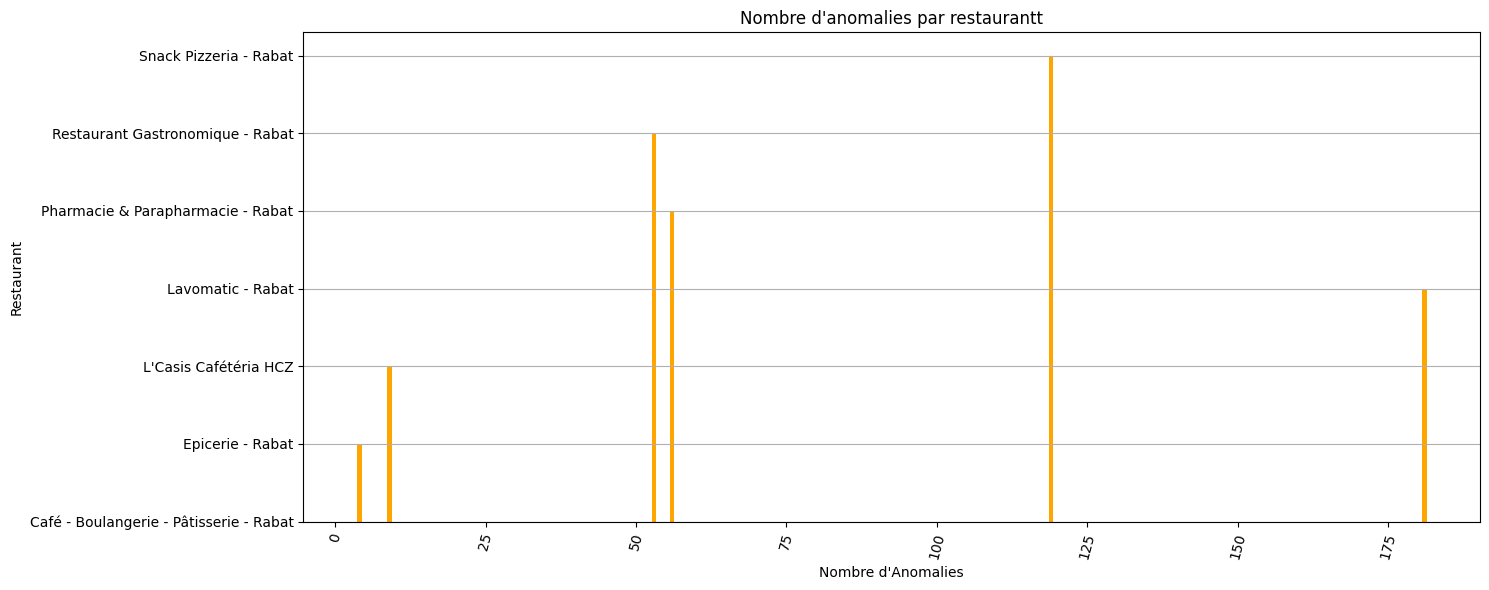

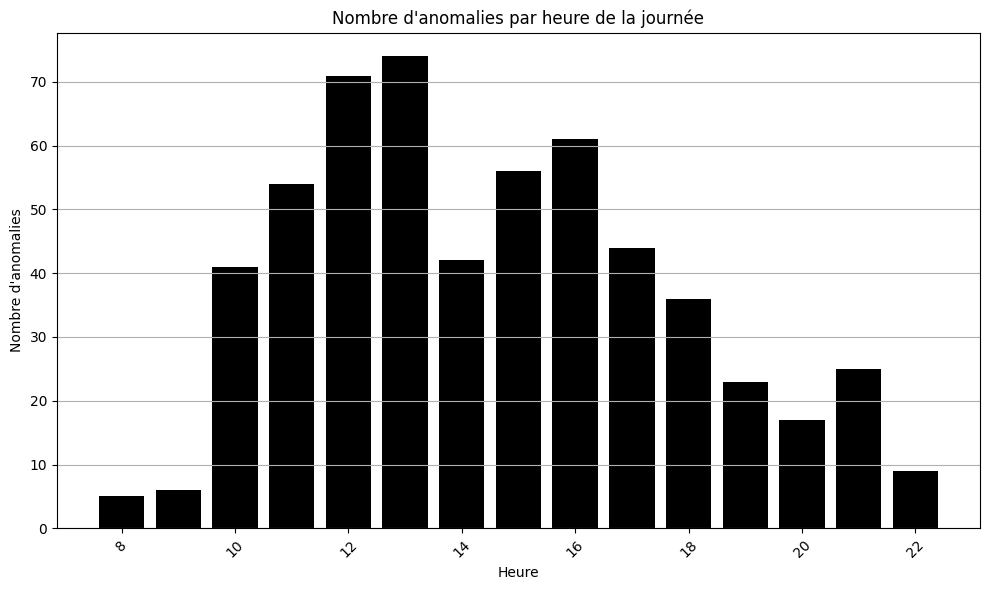

In [32]:
# Graphique en barres des anomalies par client
plt.figure(figsize=(16, 6))
plt.bar(GA_c['Bénéficiaire_CPP'], GA_c['count'], color='blue')
plt.title("Nombre d'anomalies par client")
plt.xlabel("Client")
plt.ylabel("Nombre d'Anomalies")
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.grid(axis='y')
plt.show()


# Graphique en barres montrant le nombre d'anomalies par restaurant
plt.figure(figsize=(15, 6))
plt.bar(grouped_anomalies_r['count'], grouped_anomalies_r['Restaurant'], color='orange')
plt.title("Nombre d'anomalies par restaurantt")
plt.xlabel("Nombre d'Anomalies")
plt.ylabel("Restaurant")
plt.xticks(rotation=75)  # Rotation des étiquettes pour une meilleure lisibilité
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(grouped_anomalies_h['Heure'], grouped_anomalies_h['count'], color='black')
plt.title("Nombre d'anomalies par heure de la journée")
plt.xlabel('Heure')
plt.ylabel('Nombre d\'anomalies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [33]:
# Grouper par caissier et calculer le montant total et le nombre de transactions
caissier_performance = df.groupby('Prenom User').agg(
    montant_total=('Montant_Rgl', 'sum'),
    nb_transactions=('Montant_Rgl', 'count')
).reset_index()

# Renommer les colonnes pour plus de clarté
caissier_performance.columns = ['Caissier', 'Montant_Total', 'Nombre_Transactions']

# Afficher les performances des caissiers
print(caissier_performance)


      Caissier  Montant_Total  Nombre_Transactions
0   Abdelkarim        9759.50                  515
1    Abdelkrim        2975.30                  204
2        Ayman        4582.00                  235
3        Ayoub       38756.00                  797
4        Fadwa       46274.14                  641
5        Hamza       96208.00                 4158
6       Kawtar        8923.09                   26
7       Moncef        4927.95                  324
8        Morad        7230.00                  361
9       Mourad       24400.70                   68
10     Souhail      191311.50                 4311
11    Soundoss       81483.00                 3581


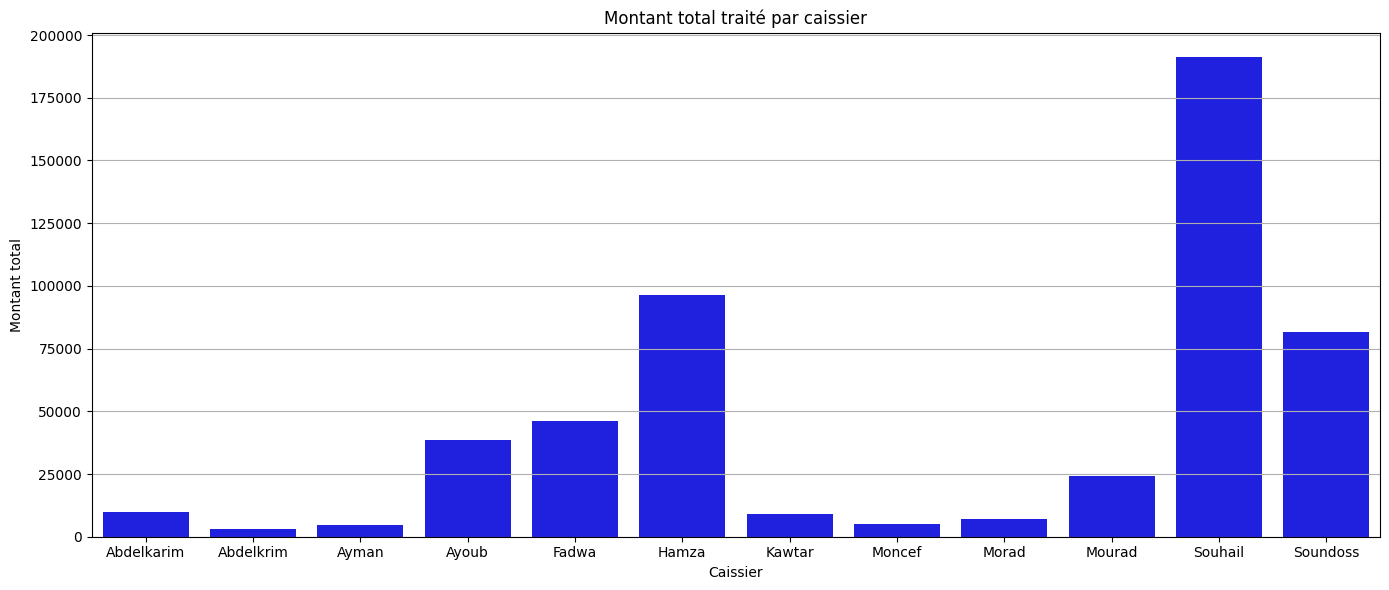

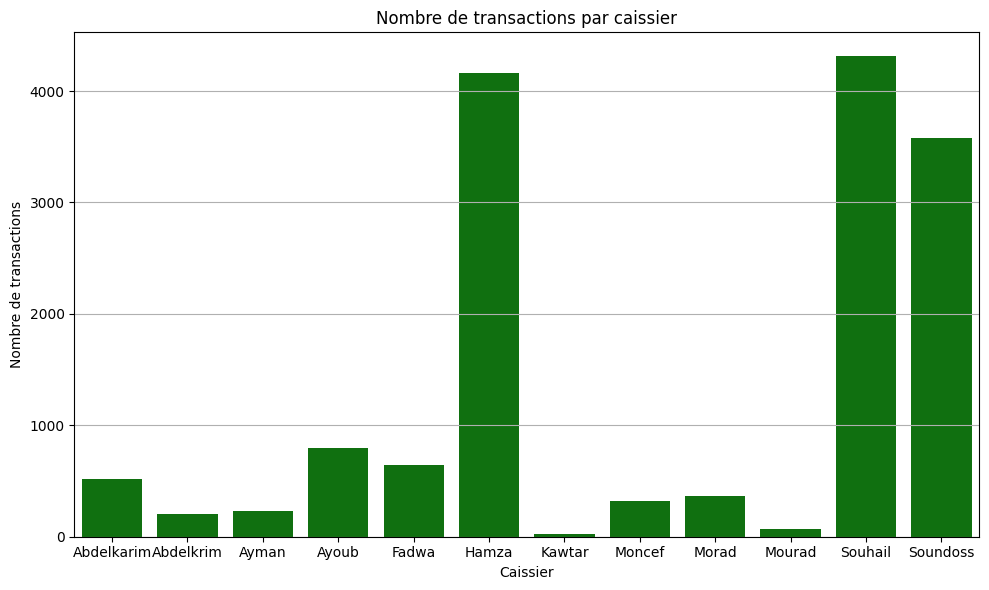

In [34]:
# Graphique en barres du montant total traité par chaque caissier
plt.figure(figsize=(14, 6))
sns.barplot(caissier_performance, x='Caissier', y='Montant_Total', color='blue')
plt.title('Montant total traité par caissier')
plt.xlabel('Caissier')
plt.ylabel('Montant total')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# b) Graphique en barres du nombre de transactions effectuées par chaque caissier
plt.figure(figsize=(10, 6))
sns.barplot(caissier_performance, x='Caissier', y='Nombre_Transactions', color='green')
plt.title('Nombre de transactions par caissier')
plt.xlabel('Caissier')
plt.ylabel('Nombre de transactions')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [35]:
# Calculer les dépenses totales par client
depenses_totales = df.groupby('Bénéficiaire_CPP').agg({'Montant_Rgl': 'sum'}).reset_index()
depenses_totales.sort_values(by='Montant_Rgl', ascending=False, inplace=True)

# Renommer la colonne pour plus de clarté
depenses_totales.columns = ['Bénéficiaire_CPP', 'Dépenses_Totales']
print(depenses_totales)

    Bénéficiaire_CPP  Dépenses_Totales
735            RIFAI          17737.56
230            CHAGH          12992.54
764          SELMANI          12726.85
192      BOUICHENADE          11338.00
728         REGRAGUI          10653.67
..               ...               ...
293        EL ANSARI              2.00
605            MAHDA              2.00
210       BOUSSALHAM              2.00
216          BOUZIDI              2.00
124        BEN DAOUD              1.50

[855 rows x 2 columns]


Coefficient de corrélation entre Solde_CPP et Montant_Rgl : 0.18
Coefficient de corrélation pour chaque client : 0.36


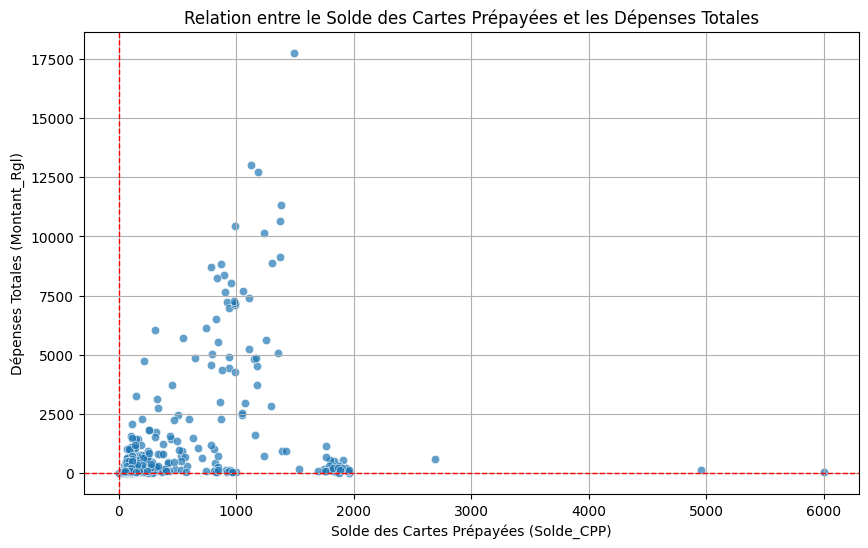

In [36]:
# Étape 1 : Calculer la corrélation globale
correlation = df['Solde_CPP'].corr(df['Montant_Rgl'])
print(f"Coefficient de corrélation entre Solde_CPP et Montant_Rgl : {correlation:.2f}")

# Étape 2 : Créer un DataFrame agrégé par client
client_summary = df.groupby('Bénéficiaire_CPP').agg(
    total_dépenses=('Montant_Rgl', 'sum'),
    solde=('Solde_CPP', 'mean')
).reset_index()

# Étape 3 : Calculer la corrélation entre le solde et les dépenses totales
client_correlation = client_summary['solde'].corr(client_summary['total_dépenses'])
print(f"Coefficient de corrélation pour chaque client : {client_correlation:.2f}")

# Étape 4 : Visualiser avec un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=client_summary, x='solde', y='total_dépenses', alpha=0.7)
plt.title('Relation entre le Solde des Cartes Prépayées et les Dépenses Totales')
plt.xlabel('Solde des Cartes Prépayées (Solde_CPP)')
plt.ylabel('Dépenses Totales (Montant_Rgl)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Ligne horizontale à y=0
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Ligne verticale à x=0
plt.grid()
plt.show()